1. Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Set display options
sns.set(style='whitegrid')

##### This sets the plot style to a white background grid for clearer visuals####

2. Load the Data

In [63]:
#Load datasets
heroes_df = pd.read_csv(r"C:\Users\mdimitrova\OneDrive - Marlink\Desktop\AAK\archive\heroes_information.csv")
powers_df = pd.read_csv(r"C:\Users\mdimitrova\OneDrive - Marlink\Desktop\AAK\archive\super_hero_powers.csv")

##### Data is loaded from CSSV files, ensuring I'm working with my local dataset files ##### 

3. Initial Data Inspection

In [64]:
# Display the first few rows
print("Heroes DataFrame:")
display(heroes_df.head())  # Assuming heroes_df is your DataFrame

print("\nPowers Dataframe:")
display(powers_df.head())  # Assuming powers_df is your DataFrame

##### Displaying first few rows of both dataframes to check structure, column name, and initial observations #####

# Check data shapes
print(f"Heroes DataFrame shape: {heroes_df.shape}")
print(f"Powers DataFrame shape: {powers_df.shape}")
##### This helps understand the size of both datasets, how many rows and columns they contain #####

# Check for missing values
print("\nMissing values in heroes_df:")
print(heroes_df.isnull().sum())
##### Checking missing values to identify columns or rows that need to be cleaned #####

print("\nMissing values in powers_df:")
print(powers_df.isnull().sum())


Heroes DataFrame:


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0



Powers Dataframe:


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Heroes DataFrame shape: (734, 11)
Powers DataFrame shape: (667, 168)

Missing values in heroes_df:
Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

Missing values in powers_df:
hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64


4. Data Cleaning
4.1 Handle Missing Values

In [65]:
#Replace '-' with NaN
heroes_df = heroes_df.replace('-', np.nan)

#Drop rows with missing 'name' 
heroes_df = heroes_df.dropna(subset=['name'])

#Fill missing Publisher values with 'Unknown'
heroes_df['Publisher'] = heroes_df['Publisher'].fillna('Unknown')

# Convert ' Height' and 'Weight' to numeric
heroes_df['Height'] = pd.to_numeric(heroes_df['Height'], errors='coerce')
heroes_df['Weight'] = pd.to_numeric(heroes_df['Weight'], errors='coerce')

#Drop rows with unrealistic values
heroes_df = heroes_df[(heroes_df['Height']>0) &(heroes_df['Weight']> 0)]
##### Data cleaning - replacing invalid or missing data with more meaningful values ##### 
##### Also ensuring that values make sense by removing unrealistic ones like zero height or weight##### 



4.2 Filter Femele Heroes

In [75]:
# Filter for female heroes
female_heroes_df = heroes_df[heroes_df['Gender'].str.lower() == 'female']
##### Filtering dataset for female superheroes to focus analysis on women heroes only##### 

5. Merge Datasets

In [76]:
# Merge on 'name' column
merged_df = pd.merge(female_heroes_df, powers_df, left_on='name', right_on='hero_names', how='inner')

# Drop redundant 'hero_names' column
merged_df.drop(columns=['hero_names'], inplace=True)


6.Feature Engeneering

In [77]:
# Identify power columns (boolean indicators)
power_columns = powers_df.columns.drop('hero_names')

# Calculate total number of powers per hero
merged_df['Total Powers'] = merged_df[power_columns].sum(axis=1)


7. Exploratory Data Analysis(EDA)

7.1.dISTRIBUTION OF tOTAL pOWERS

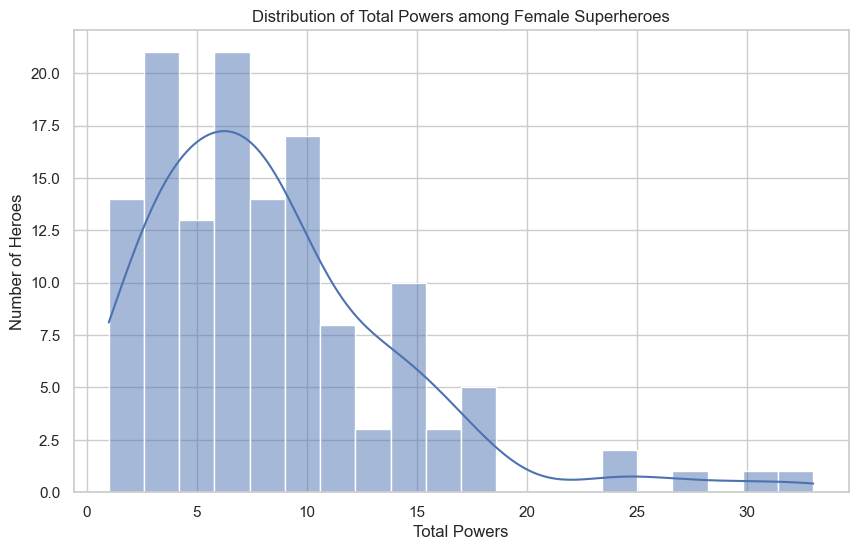

In [78]:
# Visualization 1: Distribution of Total Powers
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Total Powers'], bins=20, kde=True)
plt.title('Distribution of Total Powers among Female Superheroes')
plt.xlabel('Total Powers')
plt.ylabel('Number of Heroes')
plt.show()
##### Visualizing the distribution of the total number of powers for female superheroes. This helps understand the spread and central tendency. ##### 


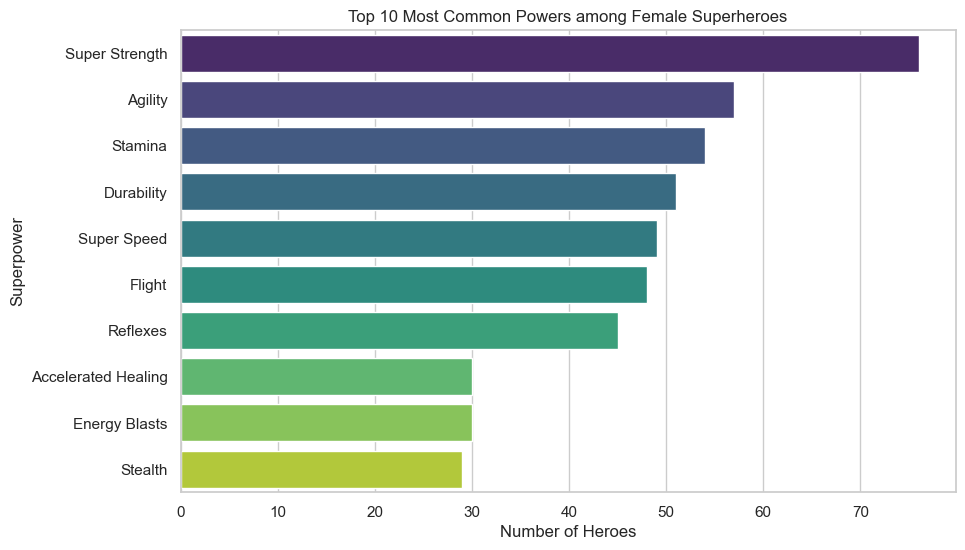

In [82]:
#7.2 Top 10 Most Common Powers
#Sum each power across all female heroes
top_powers = merged_df[power_columns].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_powers.values, y=top_powers.index, hue=top_powers.index, palette = "viridis", dodge=False, legend=False)
plt.title ('Top 10 Most Common Powers among Female Superheroes')
plt.xlabel('Number of Heroes')
plt.ylabel('Superpower')
plt.show()


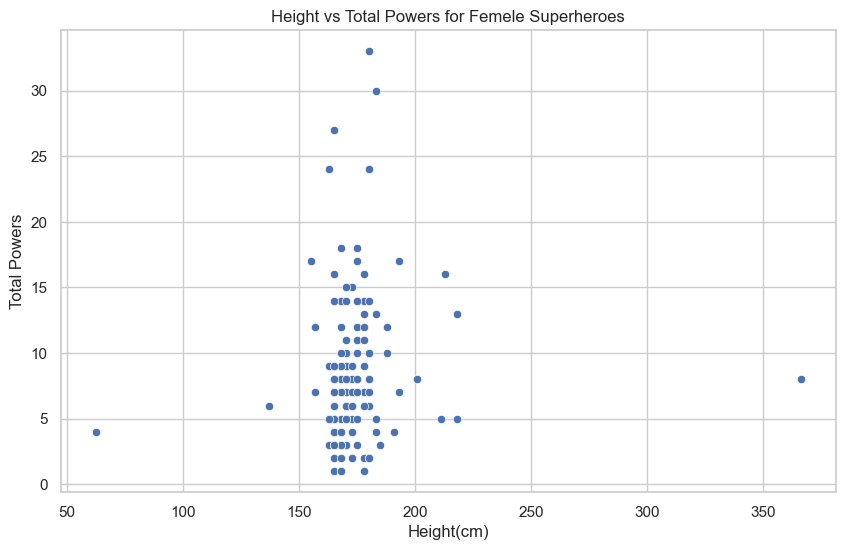

In [83]:
#7.3 Height vs Total Powers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Height', y='Total Powers')
plt.title('Height vs Total Powers for Femele Superheroes')
plt.xlabel('Height(cm)')
plt.show()


In [84]:
!pip install wordcloud

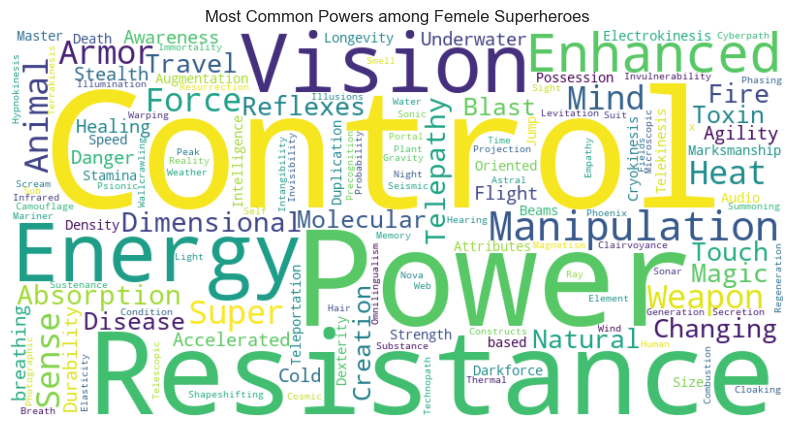

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Combingn all powers into a single string
all_powers = " ".join(merged_df[power_columns].columns[merged_df[power_columns].sum() > 0])

#Creating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(all_powers)

#Plot the word cloud
plt.figure(figsize =(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Powers among Femele Superheroes')
plt.show()

C:\Users\mdimitrova\AppData\Local\Temp\ipykernel_23520\1120299069.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette='Set1')


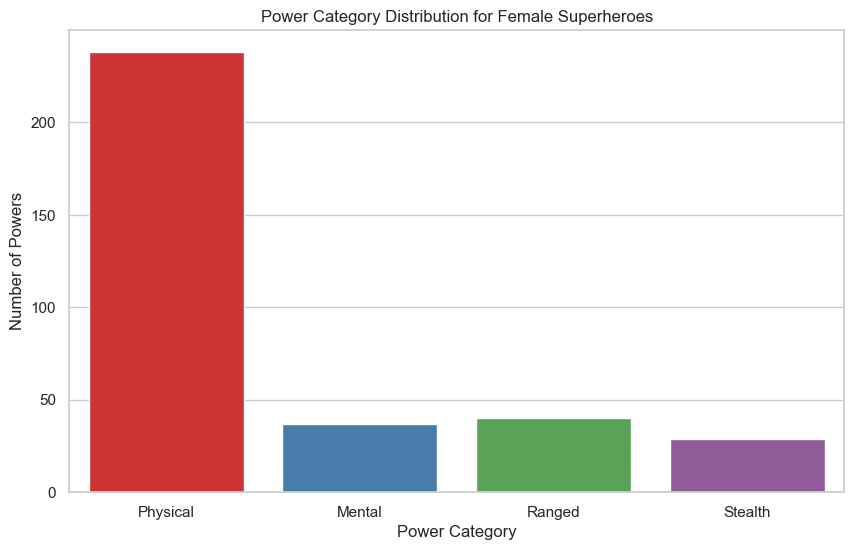

In [98]:
# Example of categorizing powers
power_categories = {
    'Physical': ['Super Strength', 'Agility', 'Stamina', 'Durability'],
    'Mental': ['Telepathy', 'Mind Control', 'Telekinesis'],
    'Ranged': ['Energy Blasts', 'Fire Control'],
    'Stealth': ['Stealth']
}

# Count the occurrences of each category's powers
category_counts = {}
for category, powers in power_categories.items():
    category_counts[category] = merged_df[powers].sum().sum()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette='Set1')
plt.title('Power Category Distribution for Female Superheroes')
plt.xlabel('Power Category')
plt.ylabel('Number of Powers')
plt.show()
